<a href="https://colab.research.google.com/github/violjii/lab_Serhiienko/blob/main/Lab1_Serhiienko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.0000e+00 - loss: 3.8743
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0470 - loss: 3.8507 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0835 - loss: 3.8282
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0966 - loss: 3.8046 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0600 - loss: 3.7717
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0705 - loss: 3.7509 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0600 - loss: 3.7276
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0392 - loss: 3.7234    
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0392 - loss: 3.7049    
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0835 - loss: 3.6560
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1097 - loss: 3.6119
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accura

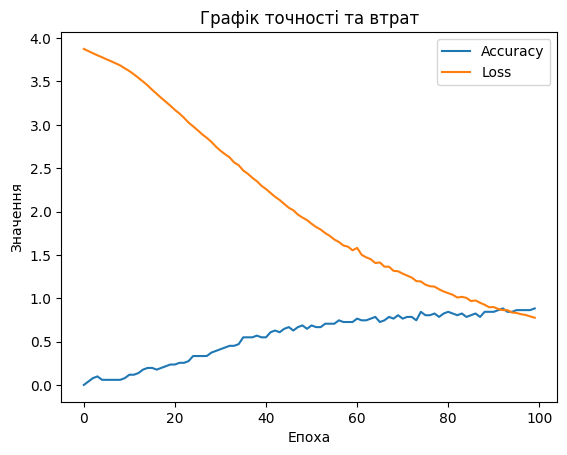

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Україна — — — у східній європі з багатою історією та


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

# 🔤 Текст про Україну
text = """
Україна — незалежна держава у Східній Європі з багатою історією та культурою.
Її столиця — Київ, місто з понад тисячолітньою історією, що було центром Київської Русі.
Українські традиції, мова та народне мистецтво зберігають свою самобутність і передаються з покоління в покоління.
Природа України різноманітна — від Карпатських гір до широких степів і берегів Чорного моря.
"""

# 🔢 Токенізація тексту
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 🧱 Побудова послідовностей
input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# ➕ Доповнення нулями до однакової довжини
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# 🎯 Формування X і y
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

# 🏗️ Побудова RNN-моделі
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(SimpleRNN(64))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 🧪 Навчання моделі
history = model.fit(X, y, epochs=100, verbose=1)

# 📊 Візуалізація результатів
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title("Графік точності та втрат")
plt.xlabel("Епоха")
plt.ylabel("Значення")
plt.legend()
plt.show()

# 🔮 Функція для генерації наступного слова
def generate_text(seed_text, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# 📝 Приклад генерації
print(generate_text("Україна", next_words=10))
